<a href="https://colab.research.google.com/github/Nikita1013/Machine-Learning-with-Python/blob/master/7_1_3_Building_Linear_Regression_from_Stratch_in_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Linear Regression:

**Y = wX+b**

Y --> dependent Variable

X --> Indepennt Variable

w --> weight

b --> bias

**Gradient Descent:**

Gradient Descent is an optimized algorithm used for minimizing the loss function in various machine learning algorithms. It is used for updating the parameters of the learning model.

w = w -a*dw

b = b - a*db

**Learning Rate :**

Learning rate is a tuning parameter in an optimization algorithm that determines the step size at each iteration while moving toward a minimum of a loss function.

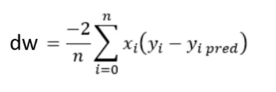

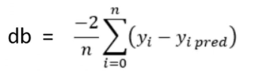

Work Flow of the Linear Regression Model:

Step-1 : Set Learning Rate & Number of Iterations; Initiate Random weight and bias value.

Step-2 : Build Linear Regression Equation. (y = wx + b)

Step-3 : Find the "y pred" value for given x value for the corresponding weight & bias.

Step-4 : Check the loss function for these parameter values. (difference between "y pred" & "true y")

Step-5 : Update the parameter values using Gradient Descent. (new weight & bias value)

Step-6 : Step 3, 4, 5 are repeated till we get minimum loss function.

Finally we will get the best model (best weight and bias value) as it has minimum loss fuction.

In [1]:
# importing numpy library
import numpy as np

**Linear Regression**

In [2]:
class Linear_Regression():

# initiating the parameters (learning _rate & no_of_iterations)
  def __init__(self, learning_rate, no_of_iterations):
    self.learning_rate = learning_rate
    self.no_of_iterations = no_of_iterations


  def fit(self, X, Y):

    # number of training examples & number of testing examples

    self.m, self.n = X.shape           # number of Rows(m) & Columns(n)

    # initiating the weight and bias
    self.w = np.zeros(self.n)
    self.b = 0
    self.X = X
    self.Y = Y

    # implementing Gradient Descent

    for i in range(self.no_of_iterations):
      self.update_weights()


  def update_weights(self ):


    Y_prediction = self.predict(self.X)

    # calculate  gradients

    dw = - (2 *(self.X.T).dot(self.Y - Y_prediction)) / self.m

    db = - 2 * np.sum(self.Y - Y_prediction) / self.m

    # updating the weights

    self.w = self.w - self.learning_rate * dw

    self.b = self.b - self.learning_rate * db


# line function for prediction
  def predict(self, X):

    return X.dot(self.w) + self.b


Using Linear Regression Model for Prediction

In [3]:
# importing the dependencies
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

Data Pre-Processing

In [4]:
# loading the data from csv file to pandas dataframe
salary_data = pd.read_csv('/content/salary_data.csv')

In [5]:
# printing the first 5 rows of the dataframe
salary_data.head()

,YearsExperience,Salary
0,1.1,39343
1,1.3,46205
2,1.5,37731
3,2.0,43525
4,2.2,39891


In [6]:
# printing the last 5 rows of the dataframe
salary_data.tail()

,YearsExperience,Salary
25,9.0,105582
26,9.5,116969
27,9.6,112635
28,10.3,122391
29,10.5,121872


In [7]:
# number of rows and columns in a dataset
salary_data.shape

(30, 2)

In [8]:
#getting some info about the dataset
salary_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 612.0 bytes


In [9]:
# Statistical Measures of the dataset
salary_data.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


In [10]:
#checking the missing values
salary_data.isnull().sum()

,0
YearsExperience,0
Salary,0


Splitting the feature and target

In [11]:
X = salary_data.iloc[:,:-1].values
Y = salary_data.iloc[:,1].values

In [12]:
print(X)

[[ 1.1]
 [ 1.3]
 [ 1.5]
 [ 2. ]
 [ 2.2]
 [ 2.9]
 [ 3. ]
 [ 3.2]
 [ 3.2]
 [ 3.7]
 [ 3.9]
 [ 4. ]
 [ 4. ]
 [ 4.1]
 [ 4.5]
 [ 4.9]
 [ 5.1]
 [ 5.3]
 [ 5.9]
 [ 6. ]
 [ 6.8]
 [ 7.1]
 [ 7.9]
 [ 8.2]
 [ 8.7]
 [ 9. ]
 [ 9.5]
 [ 9.6]
 [10.3]
 [10.5]]


In [13]:
print(Y)

[ 39343  46205  37731  43525  39891  56642  60150  54445  64445  57189
  63218  55794  56957  57081  61111  67938  66029  83088  81363  93940
  91738  98273 101302 113812 109431 105582 116969 112635 122391 121872]


Splitting the dataset into training & test data

In [14]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.33, random_state = 2)

Training the Regresssion MODEL

In [18]:
model = Linear_Regression(learning_rate = 0.02,no_of_iterations=1000)

In [19]:
model.fit(X_train, Y_train)

In [20]:
# printing the parameter values (weights & bias)

print('weight = ', model.w[0])
print('bias = ', model.b)

weight =  9514.400999035135
bias =  23697.406507136307


y = 9541(x)+ 23697

salary = 9514(experience) + 23697

In [21]:
test_data_prediction = model.predict(X_test)

In [22]:
print(test_data_prediction)

[ 36066.12780588  34163.24760607  66512.21100279  58900.69020357
  91249.65360029  80783.81250135 101715.49469922  52240.60950424
  42726.20850521  88395.33330058]


Visualizing the Predicted values & Actual Values

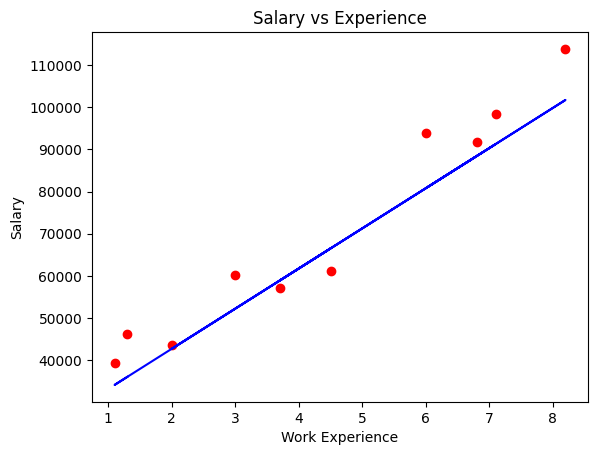

In [25]:
plt.scatter(X_test, Y_test, color='red')
plt.plot(X_test, test_data_prediction, color='blue')
plt.xlabel('Work Experience')
plt.ylabel('Salary')
plt.title('Salary vs Experience')
plt.show()